In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
from ipyleaflet import Map, Marker, basemaps, basemap_to_tiles,Heatmap, LayersControl
from random import uniform
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [3]:
cd ..

/Users/alphonsowoodbury/DS/Projects/aw_flatiron_group_projects/Module3_Project


In [78]:
df = pd.read_csv('data/cleaned_water.csv',index_col=0)

#define classes
df['status_group'] = df['status_group'].replace(to_replace =["functional needs repair", "non functional"],value ="needs repair")
df['status_group'] = df['status_group'].map({'functional': 0, 'needs repair': 1})

In [51]:
df.head()

,status_group,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,region,lga,...,permit,extraction_type_class,management,payment_type,water_quality,quantity,source,source_class,waterpoint_type,age
0,0,6000.0,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,Ludewa,...,False,gravity,vwc,annually,soft,enough,spring,groundwater,communal standpipe,21
2,0,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Manyara,Simanjiro,...,True,gravity,vwc,per bucket,soft,enough,dam,surface,communal standpipe multiple,11
3,1,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,Nanyumbu,...,True,submersible,vwc,never pay,soft,dry,machine dbh,groundwater,communal standpipe multiple,34
5,0,20.0,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Pangani,Tanga,Mkinga,...,True,submersible,vwc,per bucket,salty,enough,other,unknown,communal standpipe multiple,11
6,1,0.0,Dwsp,0,DWSP,33.362410,-3.766365,Internal,Shinyanga,Shinyanga Rural,...,True,handpump,vwc,never pay,soft,enough,machine dbh,groundwater,hand pump,23


---

## Target

Status Group

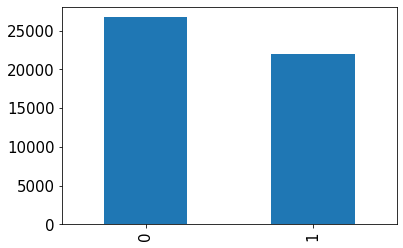

In [52]:
df.status_group.value_counts().plot(kind='bar',fontsize=15) #can this be a boxplot? #this is unbalanced

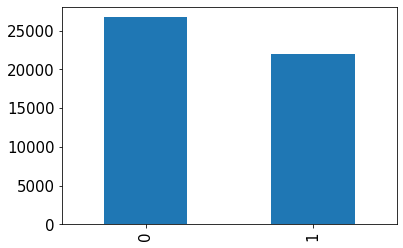

In [53]:
df_b = pd.DataFrame()
df_b['status_group'] = df['status_group'].replace(to_replace =["functional needs repair", "non functional"],value ="needs repair")

df_b.status_group.value_counts().plot(kind='bar',fontsize=15) #can this be a boxplot? #this is unbalanced

In [54]:
# targets = df[['amount_tsh','status_group']]
# targets['count'] = 1

# targets = targets.groupby(['status_group','amount_tsh'],as_index=True).count()
# targets.unstack().plot(kind='bar',figsize=(10,10))

---

## Features

### Water

#### Feature: Tsh Value

In [55]:
df.amount_tsh.sort_values().value_counts()

0.0         32514
500.0        2787
50.0         2035
1000.0       1381
20.0         1378
            ...  
5400.0          1
1400.0          1
200000.0        1
53.0            1
12.0            1
Name: amount_tsh, Length: 91, dtype: int64

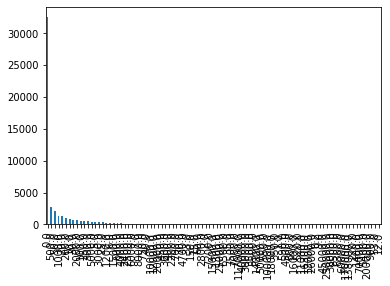

In [56]:
df.amount_tsh.value_counts().plot(kind='bar')

#### Feature: Quality

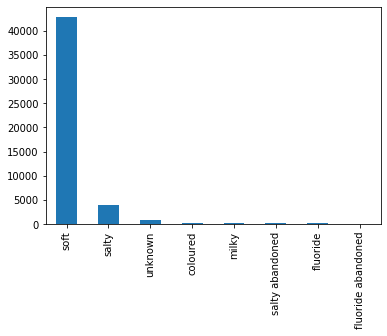

In [57]:
df.water_quality.value_counts().plot(kind='bar')

#### Feature: Quantity

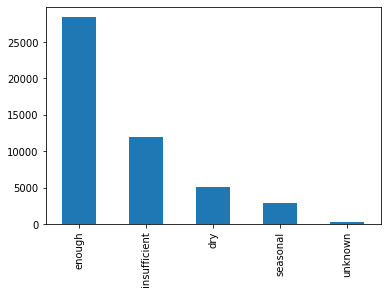

In [58]:
df.quantity.value_counts().plot(kind='bar')

#### Feature: Source

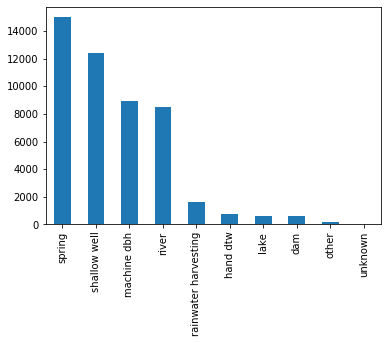

In [59]:
df.source.value_counts().plot(kind='bar')

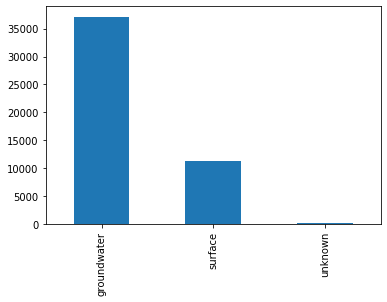

In [60]:
df.source_class.value_counts().plot(kind='bar')

#### Feature: Basin

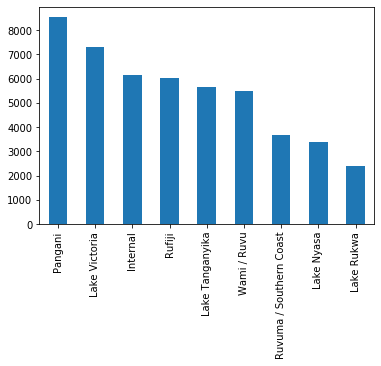

In [61]:
df.basin.value_counts().plot(kind='bar')

### Waterpoint

#### Feature: Waterpoint Age

In [79]:
mybins = range(0, df.age.max(), 10)
df['age_bucket'] = pd.cut(df.age, bins=mybins)
df['age_bucket'].value_counts()

df_age = df#.groupby(['age_bucket'],axis=0).mean()
df_age = df_age.reset_index()
df_age.age_bucket = df_age.age_bucket.astype('str')

df_age

,index,status_group,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,region,...,extraction_type_class,management,payment_type,water_quality,quantity,source,source_class,waterpoint_type,age,age_bucket
0,0,0,6000.0,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,...,gravity,vwc,annually,soft,enough,spring,groundwater,communal standpipe,21,"(20.0, 30.0]"
1,2,0,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Manyara,...,gravity,vwc,per bucket,soft,enough,dam,surface,communal standpipe multiple,11,"(10.0, 20.0]"
2,3,1,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,...,submersible,vwc,never pay,soft,dry,machine dbh,groundwater,communal standpipe multiple,34,"(30.0, 40.0]"
3,5,0,20.0,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Pangani,Tanga,...,submersible,vwc,per bucket,salty,enough,other,unknown,communal standpipe multiple,11,"(10.0, 20.0]"
4,6,1,0.0,Dwsp,0,DWSP,33.362410,-3.766365,Internal,Shinyanga,...,handpump,vwc,never pay,soft,enough,machine dbh,groundwater,hand pump,23,"(20.0, 30.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48646,59394,1,500.0,World Bank,351,ML appro,37.634053,-6.124830,Wami / Ruvu,Morogoro,...,submersible,vwc,monthly,soft,enough,machine dbh,groundwater,communal standpipe,13,"(10.0, 20.0]"
48647,59395,0,10.0,Germany Republi,1210,CES,37.169807,-3.253847,Pangani,Kilimanjaro,...,gravity,water board,per bucket,soft,enough,spring,groundwater,communal standpipe,21,"(20.0, 30.0]"
48648,59396,0,4700.0,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Rufiji,Iringa,...,gravity,vwc,annually,soft,enough,river,surface,communal standpipe,24,"(20.0, 30.0]"
48649,59398,0,0.0,Malec,0,Musa,35.861315,-6.378573,Rufiji,Dodoma,...,handpump,vwc,never pay,soft,insufficient,shallow well,groundwater,hand pump,23,"(20.0, 30.0]"


In [80]:
df_age.age_bucket.iloc[0] = 10
df_age.age_bucket.iloc[1] = 20
df_age.age_bucket.iloc[2] = 30
df_age.age_bucket.iloc[3] = 40
df_age.age_bucket.iloc[4] = 50
df_age.age_bucket.iloc[5] = 60
# df_age.age_bucket.iloc[6] = 70
# df_age.age_bucket.iloc[7] = 80
# df_age.age_bucket.iloc[8] = 90
# df_age.age_bucket.iloc[9] = 100
# df_age.age_bucket.iloc[10] = 110
#df_age

In [82]:
df_age[df_age['age_bucket'] == [20.0, 30.0]] = 30
# df_age.age_bucket.iloc[1] = 20
# df_age.age_bucket.iloc[2] = 30
# df_age.age_bucket.iloc[3] = 40
# df_age.age_bucket.iloc[4] = 50
# df_age.age_bucket.iloc[5] = 60
# df_age.age_bucket.iloc[6] = 70
# df_age.age_bucket.iloc[7] = 80
# df_age.age_bucket.iloc[8] = 90
# df_age.age_bucket.iloc[9] = 100
# df_age.age_bucket.iloc[10] = 110
df_age

ValueError: Lengths must match to compare

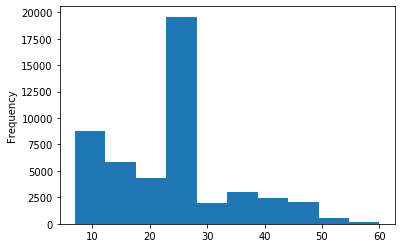

In [19]:
df.age.plot(kind='hist') #knn? 

In [75]:
df.age_bucket.value_counts()#.plot(kind='bar') #knn? 

(20, 30]    22134
(10, 20]    13224
(30, 40]     4870
(0, 10]      4013
(40, 50]     3989
Name: age_bucket, dtype: int64

In [20]:
##df[df.age == 22describe()

#### Feature: Waterpoint Type

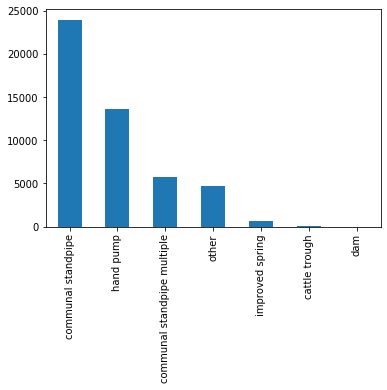

In [73]:
df.waterpoint_type.value_counts().plot(kind='bar')

#### Extraction Type

In [22]:
df.extraction_type_group.value_counts().plot(kind='bar')

AttributeError: 'DataFrame' object has no attribute 'extraction_type_group'

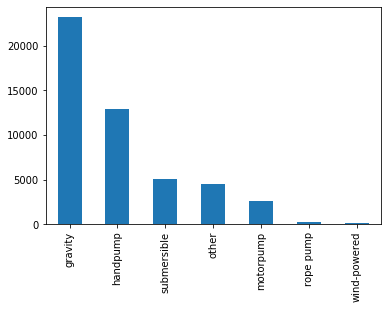

In [23]:
df.extraction_type_class.value_counts().plot(kind='bar')

In [24]:
df.extraction_type.value_counts().plot(kind='bar')

AttributeError: 'DataFrame' object has no attribute 'extraction_type'

### Governance

#### Feature: Permit

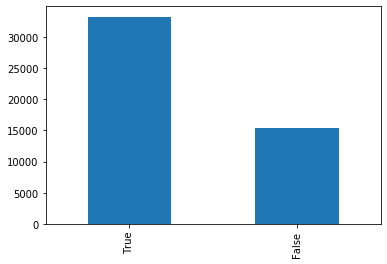

In [25]:
df.permit.value_counts().plot(kind='bar')

#### Feature: Public Meeting

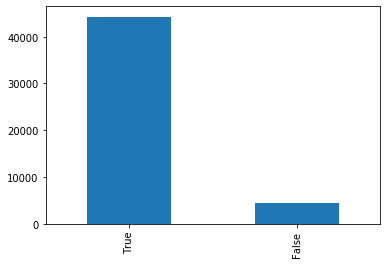

In [26]:
df.public_meeting.value_counts().plot(kind='bar')

#### Feature: Mangagement

### Feature: Funder

gpsheaight; a mountain? outlier?
longitude, are there errors? shouldnt be so far from the rest
construction year issues


In [27]:
prob = df.funder.value_counts()

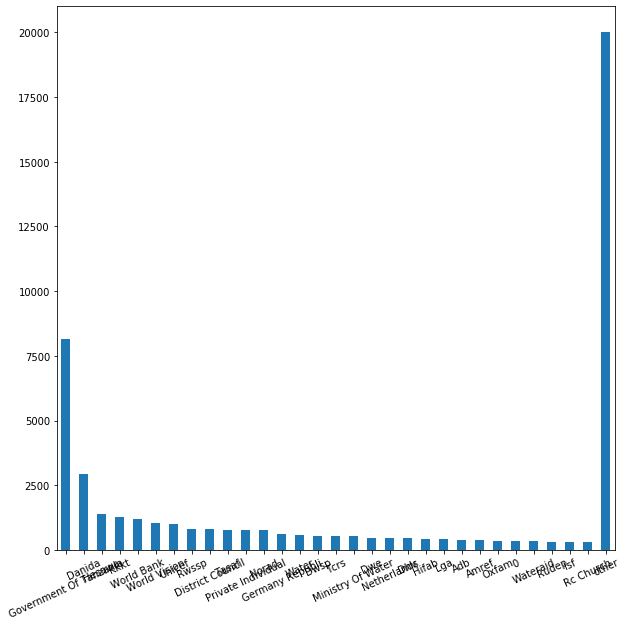

In [28]:
threshold = 300
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['other'] = tail_prob
prob.plot(kind='bar',figsize=(10,10))
plt.xticks(rotation=25)
plt.show()
#rotate labels

#### Feature: Installer

In [29]:
installer = df.installer.value_counts()

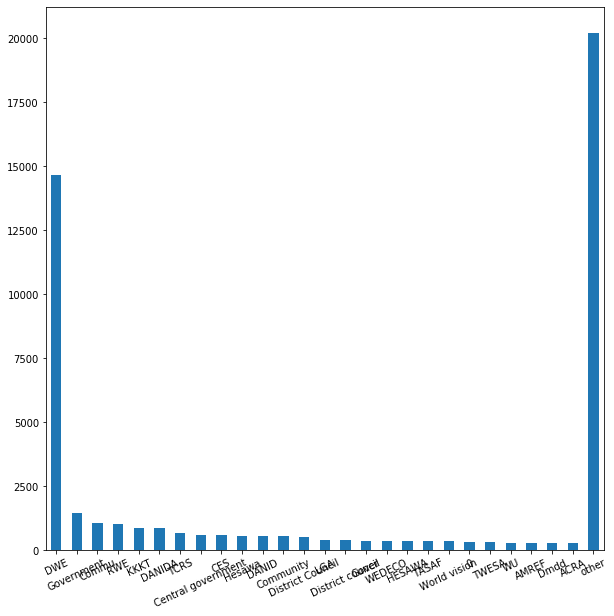

In [30]:
threshold = 250
mask = installer > threshold
tail_prob = installer.loc[~mask].sum()
installer = installer.loc[mask]
installer['other'] = tail_prob
installer.plot(kind='bar',figsize=(10,10))
plt.xticks(rotation=25)
plt.show()
#rotate labels

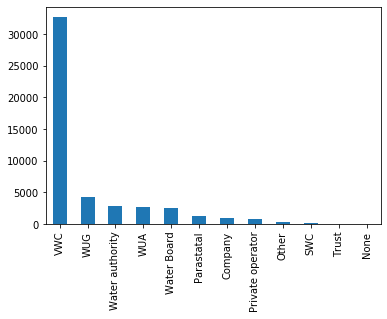

In [31]:
df.scheme_management.value_counts().plot(kind='bar')

In [32]:
# from statsmodels.graphics.mosaicplot import mosaic
# plt.rcParams['font.size'] = 6.0
# mosaic(df, ['water_quality','status_group']) 

---
---
---

/Users/alphonsowoodbury/opt/miniconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


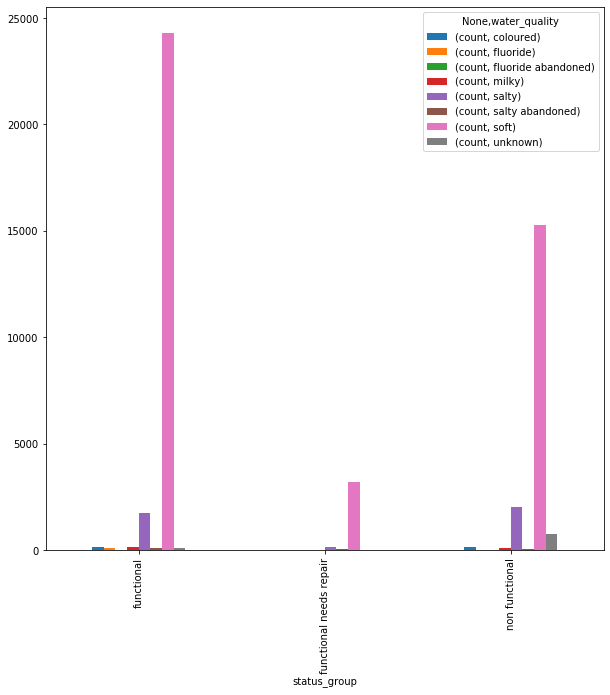

In [33]:
waterqual = df[['status_group','water_quality']]
waterqual['count'] = 1
waterqual = waterqual.groupby(['status_group','water_quality'],as_index=True).count()
waterqual
waterqual.unstack().plot(kind='bar',figsize=(10,10))

In [34]:
df[['management','status_group']]
df.water_quality.value_counts().index.tolist()

['soft',
 'salty',
 'unknown',
 'coloured',
 'milky',
 'salty abandoned',
 'fluoride',
 'fluoride abandoned']

---

In [35]:
split1 = df[['management','status_group']]
split1['count'] = 1
split1

/Users/alphonsowoodbury/opt/miniconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,management,status_group,count
0,vwc,functional,1
2,vwc,functional,1
3,vwc,non functional,1
5,vwc,functional,1
6,vwc,non functional,1
...,...,...,...
59394,vwc,non functional,1
59395,water board,functional,1
59396,vwc,functional,1
59398,vwc,functional,1


In [36]:
split11 = split1.groupby(['status_group','management'],as_index=True).count()
split11

count
status_group            management             
functional              company             241
                        other               239
                        other - school       23
                        parastatal          748
                        private operator   1081
                        trust                44
                        unknown              34
                        vwc               17315
                        water authority     397
                        water board        2006
                        wua                1635
                        wug                2957
functional needs repair company              13
                        other                30
                        other - school        1
                        parastatal          170
                        private operator     42
                        trust                 6
                        unknown               4
                        vwc                2211
                        water authority      50
                        water board         236
                        wua                 146
                        wug                 590
non functional          company             400
                        other               180
                        other - school       75
                        parastatal          413
                        private operator    395
                        trust                25
                        unknown              36
                        vwc               14366
                        water authority     352
                        water board         423
                        wua                 507
                        wug                1260

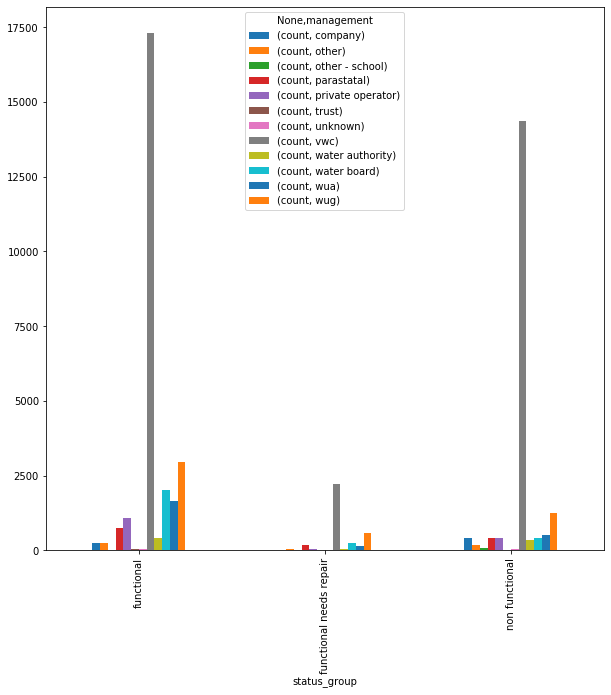

In [37]:
split11.unstack().plot(kind='bar',figsize=(10,10))

In [38]:
split12 = split1.groupby(['management','status_group'],as_index=True).count()
split12

count
management       status_group                  
company          functional                 241
                 functional needs repair     13
                 non functional             400
other            functional                 239
                 functional needs repair     30
                 non functional             180
other - school   functional                  23
                 functional needs repair      1
                 non functional              75
parastatal       functional                 748
                 functional needs repair    170
                 non functional             413
private operator functional                1081
                 functional needs repair     42
                 non functional             395
trust            functional                  44
                 functional needs repair      6
                 non functional              25
unknown          functional                  34
                 functional needs repair      4
                 non functional              36
vwc              functional               17315
                 functional needs repair   2211
                 non functional           14366
water authority  functional                 397
                 functional needs repair     50
                 non functional             352
water board      functional                2006
                 functional needs repair    236
                 non functional             423
wua              functional                1635
                 functional needs repair    146
                 non functional             507
wug              functional                2957
                 functional needs repair    590
                 non functional            1260

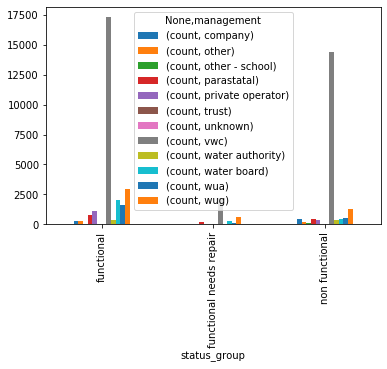

In [39]:
split11.unstack().plot(kind='bar')

In [40]:
split2 = df[['installer','status_group']]
split2['count'] = 1

split13 = split2.groupby(['status_group','installer'],as_index=True).count()
split13

/Users/alphonsowoodbury/opt/miniconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


count
status_group   installer         
functional     -                1
               0              138
               ABASIA          23
               ABD              1
               AC               2
...                           ...
non functional wanan            3
               wananchi        17
               water board      2
               world            3
               world banks      1

[2651 rows x 1 columns]

/Users/alphonsowoodbury/opt/miniconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


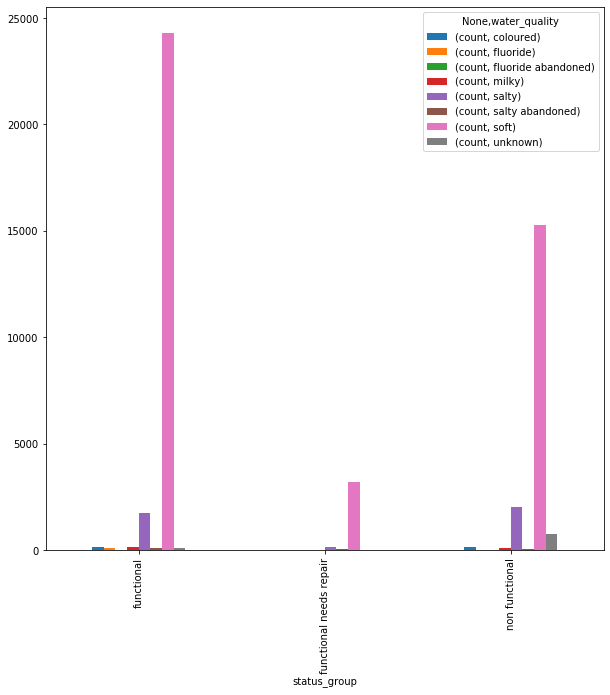

In [41]:
waterfeatures = df[['water_quality','status_group']]
waterfeatures['count'] = 1

waterfeatures = waterfeatures.groupby(['status_group','water_quality'],as_index=True).count()
waterfeatures.unstack().plot(kind='bar',figsize=(10,10))

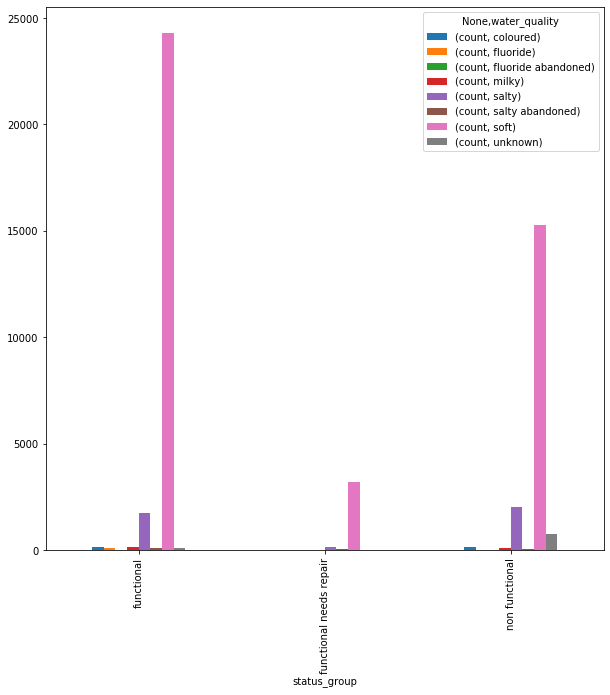

In [42]:
waterfeatures.unstack().plot(kind='bar',figsize=(10,10))